In [145]:
#Imports
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#pip install scikit-learn

In [146]:
#Read dataset
csv = pd.read_csv('ds_salaries.csv')

#Set mapings
experience_level_map = {
    "EN": 0,
    "EX": 1,
    "MI": 2,
    "SE": 3
}
employment_type_map = {
    "CT": 0,
    "FL": 1,
    "FT": 2,
    "PT": 3
}
job_title_map = {
    "3D Computer Vision Researcher": 0,
    "AI Developer": 1,
    "AI Programmer": 2,
    "AI Scientist": 3,
    "Analytics Engineer": 4,
    "Applied Data Scientist": 5,
    "Applied Machine Learning Engineer": 6,
    "Applied Machine Learning Scientist": 7,
    "Applied Scientist": 8,
    "Autonomous Vehicle Technician": 9,
    "Azure Data Engineer": 10,
    "BI Analyst": 11,
    "BI Data Analyst": 12,
    "BI Data Engineer": 13,
    "BI Developer": 14,
    "Big Data Architect": 15,
    "Big Data Engineer": 16,
    "Business Data Analyst": 17,
    "Business Intelligence Engineer": 18,
    "Cloud Data Architect": 19,
    "Cloud Data Engineer": 20,
    "Cloud Database Engineer": 21,
    "Compliance Data Analyst": 22,
    "Computer Vision Engineer": 23,
    "Computer Vision Software Engineer": 24,
    "Data Analyst": 25,
    "Data Analytics Consultant": 26,
    "Data Analytics Engineer": 27,
    "Data Analytics Lead": 28,
    "Data Analytics Manager": 29,
    "Data Analytics Specialist": 30,
    "Data Architect": 31,
    "Data DevOps Engineer": 32,
    "Data Engineer": 33,
    "Data Infrastructure Engineer": 34,
    "Data Lead": 35,
    "Data Management Specialist": 36,
    "Data Manager": 37,
    "Data Modeler": 38,
    "Data Operations Analyst": 39,
    "Data Operations Engineer": 40,
    "Data Quality Analyst": 41,
    "Data Science Consultant": 42,
    "Data Science Engineer": 43,
    "Data Science Lead": 44,
    "Data Science Manager": 45,
    "Data Science Tech Lead": 46,
    "Data Scientist": 47,
    "Data Scientist Lead": 48,
    "Data Specialist": 49,
    "Data Strategist": 50,
    "Deep Learning Engineer": 51,
    "Deep Learning Researcher": 52,
    "Director of Data Science": 53,
    "ETL Developer": 54,
    "ETL Engineer": 55,
    "Finance Data Analyst": 56,
    "Financial Data Analyst": 57,
    "Head of Data": 58,
    "Head of Data Science": 59,
    "Head of Machine Learning": 60,
    "Insight Analyst": 61,
    "Lead Data Analyst": 62,
    "Lead Data Engineer": 63,
    "Lead Data Scientist": 64,
    "Lead Machine Learning Engineer": 65,
    "Machine Learning Developer": 66,
    "Machine Learning Engineer": 67,
    "Machine Learning Infrastructure Engineer": 68,
    "Machine Learning Manager": 69,
    "Machine Learning Research Engineer": 70,
    "Machine Learning Researcher": 71,
    "Machine Learning Scientist": 72,
    "Machine Learning Software Engineer": 73,
    "Manager Data Management": 74,
    "Marketing Data Analyst": 75,
    "Marketing Data Engineer": 76,
    "ML Engineer": 77,
    "MLOps Engineer": 78,
    "NLP Engineer": 79,
    "Power BI Developer": 80,
    "Principal Data Analyst": 81,
    "Principal Data Architect": 82,
    "Principal Data Engineer": 83,
    "Principal Data Scientist": 84,
    "Principal Machine Learning Engineer": 85,
    "Product Data Analyst": 86,
    "Product Data Scientist": 87,
    "Research Engineer": 88,
    "Research Scientist": 89,
    "Software Data Engineer": 90,
    "Staff Data Analyst": 91,
    "Staff Data Scientist": 92
}
salary_currency_map = {
    "AUD": 0,
    "BRL": 1,
    "CAD": 2,
    "CHF": 3,
    "CLP": 4,
    "CZK": 5,
    "DKK": 6,
    "EUR": 7,
    "GBP": 8,
    "HKD": 9,
    "HUF": 10,
    "ILS": 11,
    "INR": 12,
    "JPY": 13,
    "MXN": 14,
    "PLN": 15,
    "SGD": 16,
    "THB": 17,
    "TRY": 18,
    "USD": 19
}
employee_residence_map = {
    "AE": 0,
    "AM": 1,
    "AR": 2,
    "AS": 3,
    "AT": 4,
    "AU": 5,
    "BA": 6,
    "BE": 7,
    "BG": 8,
    "BO": 9,
    "BR": 10,
    "CA": 11,
    "CF": 12,
    "CH": 13,
    "CL": 14,
    "CN": 15,
    "CO": 16,
    "CR": 17,
    "CY": 18,
    "CZ": 19,
    "DE": 20,
    "DK": 21,
    "DO": 22,
    "DZ": 23,
    "EE": 24,
    "EG": 25,
    "ES": 26,
    "FI": 27,
    "FR": 28,
    "GB": 29,
    "GH": 30,
    "GR": 31,
    "HK": 32,
    "HN": 33,
    "HR": 34,
    "HU": 35,
    "ID": 36,
    "IE": 37,
    "IL": 38,
    "IN": 39,
    "IQ": 40,
    "IR": 41,
    "IT": 42,
    "JE": 43,
    "JP": 44,
    "KE": 45,
    "KW": 46,
    "LT": 47,
    "LU": 48,
    "LV": 49,
    "MA": 50,
    "MD": 51,
    "MK": 52,
    "MT": 53,
    "MX": 54,
    "MY": 55,
    "NG": 56,
    "NL": 57,
    "NZ": 58,
    "PH": 59,
    "PK": 60,
    "PL": 61,
    "PR": 62,
    "PT": 63,
    "RO": 64,
    "RS": 65,
    "RU": 66,
    "SE": 67,
    "SG": 68,
    "SI": 69,
    "SK": 70,
    "TH": 71,
    "TN": 72,
    "TR": 73,
    "UA": 74,
    "US": 75,
    "UZ": 76,
    "VN": 77,
}
company_location_map = {
    "AE": 0,
    "AL": 1,
    "AM": 2,
    "AR": 3,
    "AS": 4,
    "AT": 5,
    "AU": 6,
    "BA": 7,
    "BE": 8,
    "BO": 9,
    "BR": 10,
    "BS": 11,
    "CA": 12,
    "CF": 13,
    "CH": 14,
    "CL": 15,
    "CN": 16,
    "CO": 17,
    "CR": 18,
    "CZ": 19,
    "DE": 20,
    "DK": 21,
    "DZ": 22,
    "EE": 23,
    "EG": 24,
    "ES": 25,
    "FI": 26,
    "FR": 27,
    "GB": 28,
    "GH": 29,
    "GR": 30,
    "HK": 31,
    "HN": 32,
    "HR": 33,
    "HU": 34,
    "ID": 35,
    "IE": 36,
    "IL": 37,
    "IN": 38,
    "IQ": 39,
    "IR": 40,
    "IT": 41,
    "JP": 42,
    "KE": 43,
    "LT": 44,
    "LU": 45,
    "LV": 46,
    "MA": 47,
    "MD": 48,
    "MK": 49,
    "MT": 50,
    "MX": 51,
    "MY": 52,
    "NG": 53,
    "NL": 54,
    "NZ": 55,
    "PH": 56,
    "PK": 57,
    "PL": 58,
    "PR": 59,
    "PT": 60,
    "RO": 61,
    "RU": 62,
    "SE": 63,
    "SG": 64,
    "SI": 65,
    "SK": 66,
    "TH": 67,
    "TR": 68,
    "UA": 69,
    "US": 70,
    "VN": 71,
}
company_size_map = {
    "L": 0,
    "M": 1,
    "S": 2
}

#Map features
csv['experience_level_int'] = csv['experience_level'].map(experience_level_map)
#csv['employment_type_int'] = csv['employment_type'].map(employment_type_map)
#csv['job_title_int'] = csv['job_title'].map(job_title_map)
#csv['salary_currency_int'] = csv['salary_currency'].map(salary_currency_map)
#csv['employee_residence_int'] = csv['employee_residence'].map(employee_residence_map)
#csv['company_location_int'] = csv['company_location'].map(company_location_map)
#csv['company_size_int'] = csv['company_size'].map(company_size_map)

#Delete string columns
dataframe = csv.drop(['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size'], axis=1)

In [147]:
dataframe.describe()

,work_year,salary,salary_in_usd,remote_ratio,experience_level_int
count,3755.000000,3.755000e+03,3755.000000,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638,2.469241
std,0.691448,6.716765e+05,63055.625278,48.589050,0.906261
min,2020.000000,6.000000e+03,5132.000000,0.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000,2.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000,3.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000,3.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000,3.000000


In [148]:
#Prepare the data
x = dataframe.drop('salary_in_usd', axis=1)
x = x.drop('salary', axis=1)
y = dataframe['salary_in_usd']

max_val = x.max()
min_val = x.min()
x = (0.98 * (x - min_val) / (max_val - min_val)) + 0.01

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [149]:
x_train

,work_year,remote_ratio,experience_level_int
2080,0.663333,0.99,0.990000
2566,0.663333,0.99,0.990000
887,0.990000,0.01,0.663333
2669,0.663333,0.99,0.990000
685,0.990000,0.01,0.663333
...,...,...,...
1130,0.990000,0.99,0.990000
1294,0.990000,0.01,0.990000
860,0.990000,0.99,0.336667
3507,0.336667,0.50,0.663333


In [155]:
#Init model
model = keras.Sequential([
    layers.Dense(160, activation="relu"),
    layers.Dense(160, activation="relu"),
    layers.Dense(160, activation="relu"),
    layers.Dense(1, activation="linear")
])

model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)



In [159]:
#Training the model
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test)
)

Epoch 1/50
6/6 [==============================] - 0s 55ms/step - loss: 14443980800.0000 - mae: 103737.7656 - val_loss: 13542396928.0000 - val_mae: 99501.2734
Epoch 2/50
6/6 [==============================] - 0s 36ms/step - loss: 13338778624.0000 - mae: 98688.5781 - val_loss: 12437420032.0000 - val_mae: 94199.3047
Epoch 3/50
6/6 [==============================] - 0s 38ms/step - loss: 12203475968.0000 - mae: 93280.5234 - val_loss: 11314452480.0000 - val_mae: 88622.8047
Epoch 4/50
6/6 [==============================] - 0s 26ms/step - loss: 11057031168.0000 - mae: 87657.1172 - val_loss: 10186275840.0000 - val_mae: 82883.6094
Epoch 5/50
6/6 [==============================] - 0s 23ms/step - loss: 9916905472.0000 - mae: 81871.1406 - val_loss: 9091393536.0000 - val_mae: 77103.6328
Epoch 6/50
6/6 [==============================] - 0s 23ms/step - loss: 8821864448.0000 - mae: 76120.8906 - val_loss: 8063990272.0000 - val_mae: 71421.1953
Epoch 7/50
6/6 [==============================] - 0s 19ms/ste

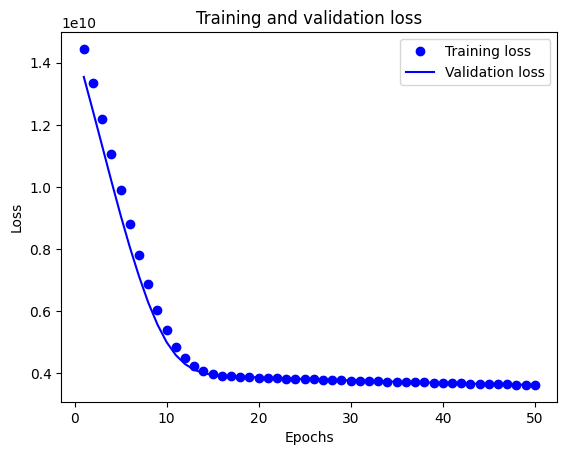

In [160]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [154]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

KeyError: 'accuracy'

<Figure size 640x480 with 0 Axes>